# **COLAB WITH**
 40 EPCOH  and  0.0001 LR

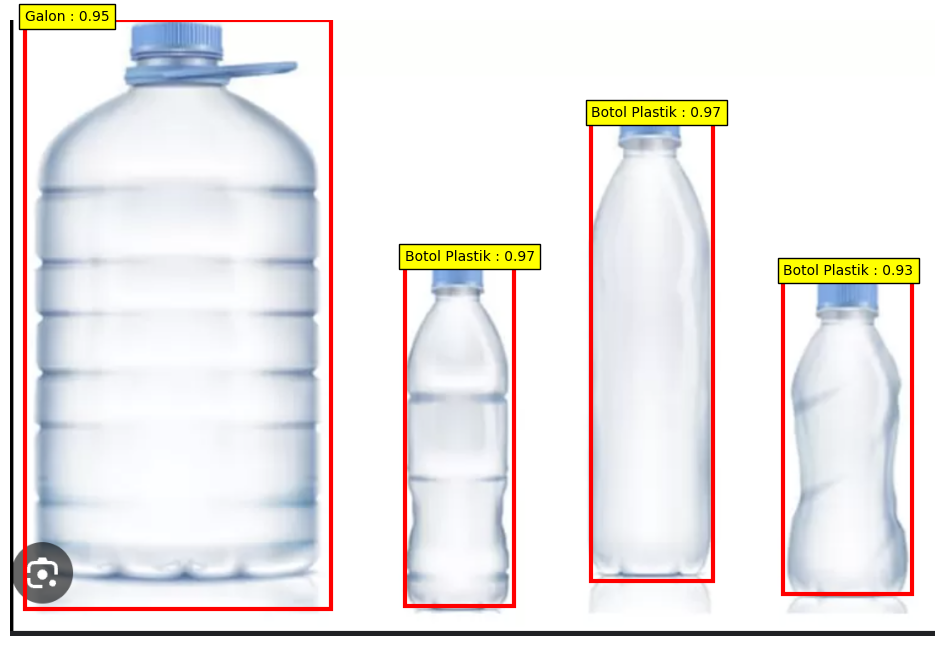

In [2]:
import torch
from torchvision.models.detection import fasterrcnn_mobilenet_v3_large_fpn
from torchvision.transforms import functional as F
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.patches as patches

# Load the state dict from the file to see its structure
checkpoint = torch.load('save_model_40e_0.0001lr/1. fasterrcnn_mobilenet_v3_large_fpn.pth', map_location='cpu') # diganti kalo ada gpu jadi 'cuda' atau 'gpu'

# Extract the model weights from the 'model_state_dict' key
model_weights = checkpoint['model_state_dict']

# Initialize the model with the number of classes it was trained with
your_num_classes = 15  # Replace this with the actual number of classes
model = fasterrcnn_mobilenet_v3_large_fpn(weights=None, num_classes=your_num_classes)
model.load_state_dict(model_weights)
model.eval()

# Define the classes
class_names = [
    'background',
 'Botol Kaca',
 'Botol Plastik',
 'Galon',
 'Gelas Plastik',
 'Kaleng',
 'Kantong Plastik',
 'Kantong Semen',
 'Kardus',
 'Kemasan Plastik',
 'Kertas Bekas',
 'Koran',
 'Pecahan Kaca',
 'Toples Kaca',
 'Tutup Galon']
# Function to load an image and transform it
def load_image(image_path):
    img = Image.open(image_path).convert("RGB")
    img_tensor = F.to_tensor(img)
    return img, img_tensor

# Load your image
image_path = 'gambar/botol dan galon.png'  # Replace this with the path to your image
original_image, tensor_image = load_image(image_path)

# Perform detection
with torch.no_grad():
    prediction = model([tensor_image])[0]

# Visualize the image and the bounding boxes
def plot_predictions(image, prediction):
    plt.figure(figsize=(12, 8))
    plt.imshow(image)
    ax = plt.gca()

    for box, score, label in zip(prediction['boxes'], prediction['scores'], prediction['labels']):
        label = class_names[label]
        if score > 0.8:  # only plot if the score is above a threshold
            x1, y1, x2, y2 = box
            rect = patches.Rectangle((x1, y1), x2-x1, y2-y1, linewidth=3, edgecolor='r', facecolor='none')
            ax.add_patch(rect)
            plt.text(x1, y1, f'{label} : {score:.2f}', bbox=dict(facecolor='yellow', alpha=1))

    plt.axis('off')
    plt.show()

plot_predictions(original_image, prediction)
